# Training YOLO with Ultralytics pipeline

In [48]:
from ultralytics import YOLO
import os, sys
from tqdm.notebook import tqdm
import ultralytics

ultralytics.checks()

import torch
import math

# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

%matplotlib inline

assert sys.version_info >= (3, 8), "Python 3.8  is required."
%load_ext lab_black

Ultralytics YOLOv8.0.120 🚀 Python-3.8.16 torch-2.0.1 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 405.0/926.4 GB disk)


True
True
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

In [2]:
# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

# # If using MPS on Apple Silicon
# if torch.backends.mps.is_built():
#     mps_device = torch.device("mps")
#     model.to(mps_device)

# # OPTIONAL for memory errors
# # Set the value of PYTORCH_MPS_HIGH_WATERMARK_RATIO
# os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] =  "0.3"

## Train

In [3]:
import wandb
wandb.init(project="MITFisheryHerring",notes="MIT Fishery robo analytics Outputs per training example: 2 Blur: Up to 4px. Now added ~50 more images. Also training on yolov8m vs yolov8n")

AttributeError: module 'wandb' has no attribute 'init'

In [ ]:
# Use the model
results = model.train(data='river_herring.yaml', epochs=15,dropout=0.4,device='mps')  # can also try mps

New https://pypi.org/project/ultralytics/8.0.120 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=river_herring.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

RuntimeError: Dataset 'river_herring.yaml' error ❌ river_herring.yaml 'val:' key missing ❌.
'train' and 'val' are required in all data YAMLs.

In [5]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerringTemp2/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:26<00:00,  4.49s/it]
                   all         94        112      0.925      0.964      0.967      0.683
Speed: 5.9ms preprocess, 256.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val13


array([    0.68346])

In [6]:
# from ultralytics.yolo.utils.benchmarks import benchmark

# # Benchmark on GPU
# benchmark(model=model, imgsz=640, half=False, device='cpu')

### Export Model

In [10]:
# Export the model
model.export(format='saved_model')

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS

PyTorch: starting from runs/detect/train38/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: simplifying with onnxsim 0.4.31...


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 1.7s, saved as runs/detect/train38/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i runs/detect/train38/weights/best.onnx -o runs/detect/train38/weights/best_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 14.6s, saved as runs/detect/train38/weights/best_saved_model (29.2 MB)

Export complete (15.7s)
Results saved to /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train38/weights
Predict:         yolo predict task=detect model=runs/detect/train38/weights/best_saved_model imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train38/weights/best_saved_model imgsz=640 data=river_herring.yaml 
Visualize:       https://netron.app


'runs/detect/train38/weights/best_saved_model'

### Load Model

In [1]:
## Record of models:
## 
# 'runs/detect/train36/weights/best_saved_model' Wandb:  https://wandb.ai/aus10powell/MITFisheryHerring/runs/txn0c9x3
from ultralytics import YOLO
model_best = YOLO( "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train179/weights/best.pt") 

In [2]:
model_best.val(split='test')

Ultralytics YOLOv8.0.136 🚀 Python-3.11.3 torch-2.1.0.dev20230515 CPU (Apple M2 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryv17i/test/labels.cache... 275 images, 13 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:34<00:00,  5.26s/it]
                   all        275        306      0.978      0.961      0.981      0.694
Speed: 0.6ms preprocess, 340.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val33


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2bf446a10>
fitness: 0.72312126882886
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.69443])
names: {0: 'river_herring'}
plot: True
results_dict: {'metrics/precision(B)': 0.9775661597309274, 'metrics/recall(B)': 0.9607843137254902, 'metrics/mAP50(B)': 0.9813205196864665, 'metrics/mAP50-95(B)': 0.6944324631780147, 'fitness': 0.72312126882886}
save_dir: PosixPath('runs/detect/val33')
speed: {'preprocess': 0.6359837271950461, 'inference': 340.60344262556595, 'loss': 0.0002973729913884943, 'postprocess': 0.3312102231112394}

In [19]:
import json
OUTPUT_DIR = os.path.join("/","Users", "aus10powell", "Downloads")
data = {'test':1}
with open(os.path.join(OUTPUT_DIR, "video_counts.json"), "w") as file:
    json_dumps_str = json.dumps(data, indent=4)
    print(json_dumps_str, file=file)

In [3]:
model117 = YOLO( "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train133/weights/best.pt") 
model117.val()

Ultralytics YOLOv8.0.120 🚀 Python-3.9.16 torch-2.0.1 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryv10i/valid/labels.cache... 403 images, 110 backgrounds, 0 corrupt: 100%|██████████| 403/403 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [05:03<00:00, 11.68s/it]
                   all        403        360      0.963      0.942      0.968       0.72
Speed: 1.0ms preprocess, 748.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val17


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x2c36aa100>
fitness: 0.7446641486674281
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.71982])
names: {0: 'river_herring'}
plot: True
results_dict: {'metrics/precision(B)': 0.962580416102837, 'metrics/recall(B)': 0.9416666666666667, 'metrics/mAP50(B)': 0.968280701205881, 'metrics/mAP50-95(B)': 0.7198178650520445, 'fitness': 0.7446641486674281}
save_dir: PosixPath('runs/detect/val17')
speed: {'preprocess': 1.0377727726257173, 'inference': 748.8294576592835, 'loss': 0.0010246674416970378, 'postprocess': 0.4548346138473776}

In [4]:
model117 = YOLO( "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train138/weights/best.pt") 
model117.val()

Ultralytics YOLOv8.0.120 🚀 Python-3.9.16 torch-2.0.1 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryv10i/valid/labels.cache... 403 images, 110 backgrounds, 0 corrupt: 100%|██████████| 403/403 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:12<00:00,  5.11s/it]
                   all        403        360       0.97      0.956      0.969      0.709
Speed: 0.6ms preprocess, 326.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val18


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x17bfb68e0>
fitness: 0.7350910979223342
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.70907])
names: {0: 'river_herring'}
plot: True
results_dict: {'metrics/precision(B)': 0.9704434202124058, 'metrics/recall(B)': 0.9555555555555556, 'metrics/mAP50(B)': 0.9693069610081688, 'metrics/mAP50-95(B)': 0.7090671131350192, 'fitness': 0.7350910979223342}
save_dir: PosixPath('runs/detect/val18')
speed: {'preprocess': 0.5826175064957764, 'inference': 326.71144937463197, 'loss': 0.0004401573768028846, 'postprocess': 0.26674542770196424}


image 1/1 /Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-04-23_16-06-05_large.jpg: 480x640 2 river_herrings, 187.7ms
Speed: 3.4ms preprocess, 187.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


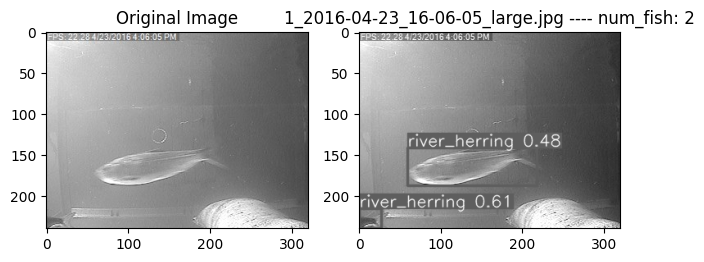

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2



herring_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Johne RIver Wapping Rd Dam/vlcsnap-2016-12-20-11h40m56s911.jpg'
white_sucker_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Underwater fish Jones River/WhiteSuckerWapping (6).JPG'
small_image = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 (Large+annotations)/IRWA Small Jpgs/Batch 1/2_2017-04-14_19-03-04.jpg'
v2_test_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/test/images/1_2016-04-21_21-50-1804298_jpg.rf.011911b9c681d5b4af70a308cdd98b93.jpg' # 2 fish
v2_valid_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/valid/images/1_2016-04-21_21-50-1803927_jpg.rf.6b36f83367e966f41544ba7e229f4d05.jpg'

random_example = "/Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-05-13_12-34-57_large.jpg"

#
v2_valid_imageb = "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerring2w/valid/images/1_2016-04-21_21-50-1804987_jpg.rf.bd983d16bbaf541a0f08db030018a540.jpg"
v2_valid_imagec = "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerring2w/valid/images/1_2016-04-21_21-50-1805011_jpg.rf.27d6d6392af4e7f3f8cac5c5bde0c0d1.jpg"

image = "/Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-04-23_16-06-05_large.jpg"

results = model_best(image)
title = image.split("/")[-1]
num_fish = len(results[0].boxes.data)

# Load and display the original image
original_image = cv2.imread(image)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")

# Generate and display the annotated frame
annotated_frame = results[0].plot()
gray = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title(title + f' ---- num_fish: {num_fish}')

plt.tight_layout()
plt.show()

### Images with biggest loss

## Tracking

In [6]:
from ultralytics import YOLO

model = model_best
video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4"
results = model.track(
    source=video_path,
    tracker="/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/bytetrack.yaml",
    show=True,
   #stream=True #Uncomment to use r in results as loop
)  # OPTIONAL: , tracker='custom_tracker.yaml'

FileNotFoundError: /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4 does not exist

### Experimenting

In [85]:
import os
import cv2
import numpy as np

# Directory path containing the JPEG images
directory = '/Users/aus10powell/Downloads/RiverHerring/NEWHerringData/2_2017-04-13_12-39-29'

# Initialize variables
widths = []
heights = []

# Iterate through the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Get the dimensions
        height, width, _ = image.shape

        # Append dimensions to the lists
        widths.append(width)
        heights.append(height)

# Convert lists to numpy arrays
widths = np.array(widths)
heights = np.array(heights)

# Calculate statistics
max_width = np.max(widths)
max_height = np.max(heights)
min_width = np.min(widths)
min_height = np.min(heights)
avg_width = np.mean(widths)
avg_height = np.mean(heights)
std_width = np.std(widths)
std_height = np.std(heights)

# Print the results
print(f"Maximum Width: {max_width}px")
print(f"Maximum Height: {max_height}px")
print(f"Minimum Width: {min_width}px")
print(f"Minimum Height: {min_height}px")
print(f"Average Width: {avg_width}px")
print(f"Average Height: {avg_height}px")
print(f"Standard Deviation of Widths: {std_width:.2f}px")
print(f"Standard Deviation of Heights: {std_height:.2f}px")


Maximum Width: 320px
Maximum Height: 240px
Minimum Width: 320px
Minimum Height: 240px
Average Width: 320.0px
Average Height: 240.0px
Standard Deviation of Widths: 0.00px
Standard Deviation of Heights: 0.00px


### Video Gold Standard Count Verification

In [10]:
import glob

PROJECT_DIR = os.path.join(
    "/", "Users", "aus10powell", "Documents", "Projects", "MIT-Fishery-Counter"
)
DATA_DIR = os.path.join(PROJECT_DIR, "data")
GOLD_DIR = os.path.join(DATA_DIR, "gold_dataset")
mp4_files = glob.glob(os.path.join(GOLD_DIR, "videos") + "/*.mp4")
[f.split("/")[-1].split(".")[0] for f in mp4_files]


['2_2017-04-15_11-23-36',
 '2_2018-04-14_10-06-19',
 '2_2018-04-28_10-54-38',
 '2_2017-04-13_13-10-00',
 '2_2018-04-14_13-18-51',
 '2_2017-06-04_06-09-56',
 '2_2018-05-10_06-39-30',
 '2_2017-04-13_14-10-29',
 '2_2017-05-24_12-56-18',
 '2_2018-04-13_15-14-33']

In [13]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from main_inference import main

import cv2
import time
from ultralytics import YOLO
import supervision as sv
import numpy as np
import json
import io
import time
import logging
import os
from tqdm import tqdm
import resource

site = "IRWA"

# True data


data = [
    {
        "file": "2_2017-04-13_13-10-00",
        "true_herring_counts": 1,
    },
    {
        "file": "2_2017-04-13_14-10-29",
        "true_herring_counts": 3,
    },
    {"file": "2_2017-04-15_11-23-36", "true_herring_counts": 1},
    {"file": "2_2018-04-14_13-18-51", "true_herring_counts": 1},
    {"file": "2_2018-04-28_10-54-38", "true_herring_counts": 3},
    {"file": "2_2018-05-10_06-39-30", "true_herring_counts": 4},
]

pred_net_counts = []
true_net_counts = []
for idx in tqdm(range(len(data))):
    video_path = [path for path in mp4_files if data[idx]["file"] in path][0]
    print(video_path)
    frame_rate, annotated_frames, out_count, in_count = main(
        video_path=video_path,device='mps'
    )
    pred_net_counts.append(out_count-in_count)
    true_net_counts.append(data[idx]["true_herring_counts"])

  0%|          | 0/6 [00:00<?, ?it/s]


/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4


video 1/1 (1/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 124.4ms
video 1/1 (2/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 101.3ms
video 1/1 (3/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 90.9ms
video 1/1 (4/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 88.6ms
video 1/1 (5/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 85.5ms
video 1/1 (6/261) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_13-10-00.mp4: 480x640 (no detections), 94.6ms
video 1/1 (7/261) /Users/aus10powell/D

/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4


video 1/1 (1/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 117.2ms
video 1/1 (2/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 102.4ms
video 1/1 (3/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 91.3ms
video 1/1 (4/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 102.5ms
video 1/1 (5/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 97.2ms
video 1/1 (6/303) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 100.3ms
video 1/1 (7/303) /Users/aus10powell

/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4


video 1/1 (1/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 132.9ms
video 1/1 (2/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 88.7ms
video 1/1 (3/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 87.6ms
video 1/1 (4/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 84.4ms
video 1/1 (5/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 83.6ms
video 1/1 (6/205) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2017-04-15_11-23-36.mp4: 480x640 1 river_herring, 86.2ms
video 1/1 (7/205) /Users/aus10powell/Do

/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4


video 1/1 (2/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 (no detections), 92.4ms
video 1/1 (3/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 1 river_herring, 102.1ms
video 1/1 (4/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 (no detections), 90.1ms
video 1/1 (5/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 (no detections), 90.0ms
video 1/1 (6/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 (no detections), 90.9ms
video 1/1 (7/139) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-14_13-18-51.mp4: 480x640 (no detections), 84.5ms
video 1/1 (8/139) /Users/aus10powell/Do

/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4


video 1/1 (2/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 121.4ms
video 1/1 (3/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 84.8ms
video 1/1 (4/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 82.3ms
video 1/1 (5/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 82.7ms
video 1/1 (6/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 84.9ms
video 1/1 (7/126) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-04-28_10-54-38.mp4: 480x640 (no detections), 82.4ms
video 1/1 (8/126) /Users/aus10powell/Do

/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4


video 1/1 (2/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 89.1ms
video 1/1 (3/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 88.8ms
video 1/1 (4/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 88.4ms
video 1/1 (5/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 85.3ms
video 1/1 (6/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 83.2ms
video 1/1 (7/120) /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/gold_dataset/videos/2_2018-05-10_06-39-30.mp4: 480x640 1 river_herring, 83.5ms
video 1/1 (8/120) /Users/aus10powell/Doc

In [17]:
import pandas as pd
import numpy as np
df_results = pd.DataFrame(data={"pred_net_counts":pred_net_counts,"true_net_counts":true_net_counts},)

,pred_net_counts,true_net_counts
0,0,1
1,0,3
2,0,1
3,0,1
4,0,3
5,0,4


In [ ]:
print("MAE:",mean_absolute_error(y_pred=pred_net_counts,y_true = true_net_counts))
print("MAPE:",mean_absolute_percentage_error(y_pred=pred_net_counts,y_true = true_net_counts))

absolute_error = [np.abs(df_results["pred_net_counts"] - df_results["true_net_counts"])]
std_absolute_error = np.std(absolute_error)
print("STD absolute error",std_absolute_error)